In [75]:
# Path ORAM 

from collections import defaultdict, deque, Counter
from enum import Enum 
from turtle import update
import random
import string


# Pure
class Node(object): 

	def __init__(self, ary, idx, left, right): 
		self.val = ary
		self.idx = idx
		self.left = left 
		self.right = right
		
	def __repr__(self):
		return f"({self.idx},{self.val},{self.left},{self.right})"

In [76]:
# Pure 

def buildingPBTLevelOrder_helper(root, nodeidx, queue):
    '''
    helper function that build a perfect binary tree by level order 
    Input: root and node id
    output: root of a tree that is level ordered 
    '''
    nNode = Node([], nodeidx, None, None) 
    if queue: 
        currNode = queue[0]
    
    if root is None:
        root = nNode
    
    elif currNode.left == None:
        currNode.left = nNode
    
    elif currNode.right == None:
        currNode.right = nNode
        queue.popleft()

    queue.append(nNode)
    return root


In [77]:
# constructing a simple binary tree
# actually each of the int in the arrary should be a pointer to a block of size B
#    0    l0
#   /\
#  1  2   l1
#  /\ /\
# 3 4 5 6 l2

def buildingPBTLevelOrder(root, lst):
    Q = deque()
    for elem in lst:
        root = buildingPBTLevelOrder_helper(root, elem, Q)
    return root

# Pure
rt = buildingPBTLevelOrder(None, range(pow(2, 4)-1))
rt.__repr__()

'(0,[],(1,[],(3,[],(7,[],None,None),(8,[],None,None)),(4,[],(9,[],None,None),(10,[],None,None))),(2,[],(5,[],(11,[],None,None),(12,[],None,None)),(6,[],(13,[],None,None),(14,[],None,None))))'

In [78]:
rt2 = buildingPBTLevelOrder(None, range(pow(2, 2)-1))
rt2.__repr__()
rt3 = buildingPBTLevelOrder(None, range(pow(2 ,3)-1))
rt3.__repr__()

'(0,[],(1,[],(3,[],None,None),(4,[],None,None)),(2,[],(5,[],None,None),(6,[],None,None)))'

In [79]:
# Pure 
def buildNodeLevelDict(root, dct, currlevel):
    ''' 
    Build a dictionary that tracks nodes and their associated ids 
    Input: root of a binary tree, dictionary to accumulate the entries of pair (node id, level) 
    Output: the dictionary that has all (node id, level) of the tree
    '''
    if not root:
        return None
    
    dct[root.idx] = currlevel

    nextlevel = currlevel + 1 
    buildNodeLevelDict(root.left, dct, nextlevel)
    buildNodeLevelDict(root.right, dct, nextlevel)

    return dct 

levelDict = buildNodeLevelDict(rt, {}, 0)    

In [80]:
# Pure 
def getHeight(root):
	'''
	Assumption: the given tree is a binary tree 
	Input: the root node of a tree 
	Output: the height of the tree 
	'''
	if not root: 
		return 0 

	leftHeight = getHeight(root.left)
	rightHeight = getHeight(root.right) 

	return max(leftHeight, rightHeight) + 1 

In [81]:
# Global set up 
N = 28 

# Z numbers of blocks within each bucket
Z = 4 
StashInit = []
LEVELS = getHeight(rt) 

# Not Sure 
random.seed(11)
position = defaultdict(int, {k:random.randrange(0, (pow(2, LEVELS) - 1)) for k in range(1,N+1)})

Operator = ['rd', 'wr']

# Pure 
sorted_pos = defaultdict(list)

# Pure 
for key,val in position.items():
    sorted_pos[val].append(key)
    

In [82]:
print(position)
print(sorted_pos)

defaultdict(<class 'int'>, {1: 7, 2: 13, 3: 8, 4: 13, 5: 14, 6: 12, 7: 7, 8: 7, 9: 8, 10: 13, 11: 9, 12: 3, 13: 2, 14: 12, 15: 8, 16: 7, 17: 10, 18: 9, 19: 12, 20: 2, 21: 1, 22: 7, 23: 4, 24: 2, 25: 1, 26: 8, 27: 12, 28: 14})
defaultdict(<class 'list'>, {7: [1, 7, 8, 16, 22], 13: [2, 4, 10], 8: [3, 9, 15, 26], 14: [5, 28], 12: [6, 14, 19, 27], 9: [11, 18], 3: [12], 2: [13, 20, 24], 10: [17], 1: [21, 25], 4: [23]})


In [83]:
# Pure 
def concatStash(stsh, anotherL):
    '''
    concantenate another list of (block id, data) to the stash
    Input: original stash, and another list 
    Output: new stash with another list concantenated to it
    '''
    for i in anotherL:
        stsh.append(i)
    return None 

In [84]:
# Pure 
def initialize_tree(root, stsh):
    '''
    initialize the tree based on the position map initialization 
    Input: root of a tree and a stash 
    Output: initialized tree, for each node in the tree, it holds Z number of blocks (data, blockid) and the rest of the blocks go into to the stash 
    '''
    if root is None:
        return None 

    data_ = [("", x) for x in sorted_pos[root.idx]]
    data = data_[:Z]
    concatStash(stsh, data_[Z:])
    
    root.val = data 
    initialize_tree(root.left, stsh)
    initialize_tree(root.right, stsh)
    return None

initialize_tree(rt, StashInit)
print(StashInit)

[('', 22)]


In [85]:
# Pure 
def getPath(root, NodeId): 
	'''
	Input: root(root) node, and leaf node(NodeId)
	Output: all nodes along the path from leaf node to root node. 
	'''
	if not root:
		return []
	
	if root.idx == NodeId:
		return [(root.idx, root.val)] 		

	leftPath = getPath(root.left, NodeId) 
	rightPath = getPath(root.right, NodeId)
 
	if leftPath:
		return leftPath +  [(root.idx, root.val)]
	if rightPath: 
		return rightPath + [(root.idx, root.val)]
		
	return []

In [86]:
# Pure 
def clearPath(root, leafId): 
    '''
    remove all blocks of nodes along the path from leaf to the root
    Input: root of a tree 
    Output: updated tree with no blocks on the path from given leaf to root
    '''
    if not root: 
        return False  
        
    temp = root.val
    root.val = []
    if root.idx == leafId: 
        return True  
    
    lp = clearPath(root.left, leafId)
    rp  = clearPath(root.right, leafId)
    
    if lp or rp: 
        return True 
    
    root.val = temp
    return False 


In [87]:
# Pure and unused
def getDataOfBlock(root, blockId):
  ''' 
  Get the data associated with a block ID in a given tree
  Input: root of a tree and a block ID
  Output: the data associated with the block ID 
  '''
  if root is not None:
    print("root val is {}".format(root.val))
    for elem in iter(root.val):
      if elem[1] == blockId:
        return elem[0]

    lres = getDataOfBlock(root.left, blockId)
    if lres is not None: 
      return lres 

    rres = getDataOfBlock(root.right, blockId)
    if rres is not None:
      return rres

In [88]:
# Pure 
def readBlockFromStsh(stsh, blockID):
    '''
    get the value associated with a give block id from the stash 
    Input: a stash that has a collection of pair (data, blockid), and a given block
    Ouput: the value associate with a given blockID 
    '''
    if stsh is None: 
        return None 
    for elem in stsh:
        if elem[1] == blockID:
            return elem[0]

In [89]:
# Pure 
def getNodeAtLevel(root, leafidx, level):
  '''
  get a node at a given level
  Input: the root of a tree, the leaf node index, a specific level
  Output: the node along the path from a given leaf node to root node at the given level 
  '''
  path = getPath(root, leafidx)
  path_len = len(path)
  if level > path_len - 1:
    return None
  return path[path_len-level-1]

In [90]:
# Pure 
def ReadnPopNodes(root, leaf, stsh):
    '''
    read all of the (block, data) pair along the path from a leaf node to the root node
    Input: the root of a tree, a leaf node, and a stash 
    Output: the updated stash and the updated tree
    Thoughts: consider merging getPath() and clearPath() to be the same function since they share the same recursion function. 
    '''
    for l in range(LEVELS):
        nd = getNodeAtLevel(root, leaf, l)
        if nd is not None:
            datum = nd[1] 
            for elem in datum: 
                stsh.append(elem)
  
    clearPath(root, leaf)
    return stsh

In [91]:
# Pure 
def getCandidateBlocksHelper(root, leaf, blockID, level, stsh): 
	'''
	helper function for finding all candidate blocks that satisfy the criteria P(x,l) = P(position[a'],l)
	Input: a root of a binary tree, a leaf node id, a block id, a level, and a stash
	Output: (node.val, node.idx)
	'''
	lhs = getNodeAtLevel(root, leaf, level)
	rhs = getNodeAtLevel(root, position[blockID], level)
	if lhs is not None and rhs is not None:
		if lhs == rhs:
			data = readBlockFromStsh(stsh, blockID)
			res = (data, blockID)
			return res
		else:
			return None 
	return None

In [92]:
# Pure 
def getCandidateBlocks(root, leaf, level, stsh):
    '''
    find all candidate blocks that satisfy the criteria P(x,l) = P(position[a'],l)
    Input: a root of a binary tree, a leaf node id, a level, and a stash 
    Output: all candidate blocks
    '''
    acc = []
    for elem in stsh:
        blocks = getCandidateBlocksHelper(root, leaf, elem[1], level, stsh)
        acc.append(blocks)
    res = [x for x in acc if x is not None]
    return res

In [93]:
# Pure reconstructing the tree with new data associated with a certain node denoted by the leafidx and the level
def writeBackNodes(root, leafIdx, tgtlevel, data):
    '''
    implementation of WriteBucket(P(x,l), S') in the paper 
    Input: root of a binary tree, leaf id, target level of the write, and new data to write to the node
    Output: None
    '''
    if not root:
        return False 
    
    temp = root.val 
    if levelDict[root.idx] == tgtlevel: 
        root.val = data
    
    if root.idx == leafIdx:
        return True
    
    lb = writeBackNodes(root.left, leafIdx, tgtlevel, data)
    rb = writeBackNodes(root.right, leafIdx, tgtlevel, data)

    if lb or rb: 
        return True

    root.val = temp 
    return False


In [94]:
# Pure 
def updateStash(blockID, dataN, stsh):
    '''
    update the data associated with block id with dataN in the stash 
    Input: block id, new data associated with the block id, and a stash 
    Output: updated stash 
    '''
    blockIndex = -1
    for (idx, pair) in enumerate(stsh):
        temp = list(pair)
        if temp[1] == blockID:
            blockIndex = idx 
    assert blockIndex != -1, "leafid not found in tree"
    stsh[blockIndex] = (dataN, blockID)


In [95]:
# Pure 
def popStash(stsh, items):
    '''
    remove all pairs (data, blockid) from items list
    Input: STASH, and list of pairs to be popped 
    Output: updated STASH 
    '''
    popIds = [] 
    for item in items:
        popIds.append(item[1])
    updatedSTASH = [x for x in stsh if x[1] not in popIds]
    return updatedSTASH

In [96]:
# Pure 
def getBlockIdsFromLst(lst):
    '''
    return all the block ids in a list
    Input: list of pair (data, blockid)
    Output: all block ids in a list
    '''
    return [x[1] for x in lst]

In [97]:
# Pure 
def getWriteBackBlocks(root, leafIdx, l, stsh):
    if len(stsh) != 0:
        candidateBlocks = getCandidateBlocks(root, leafIdx, l, stsh)
        if (len(candidateBlocks) >= Z):
            writeBackSize = Z
        else:
            writeBackSize = len(candidateBlocks)
    else:
        candidateBlocks = []
        writeBackSize = 0
    return candidateBlocks[:writeBackSize]

In [98]:
def WriteToStash(Op, bId, dN, stsh):
    if Op == "wr":
        updateStash(bId, dN, stsh)
    return 

In [99]:
def access(root, opCode, blockId, dataNew=None): 
	'''
	Access algorithm in paper Path ORAM 
	Input: root of a binary tree, operation code, either rd or wr, block id, and if the operation code is wr, dataNew is the new data to be written to the ram, otherwise, left None
	Output: If the operation code is read, there is no output, but if the operation is write, it returns the previous data associated with the block before writing 
	'''
	leafIdx = position[blockId] # let binding 
	position[blockId] = random.randrange(0, (pow(2, LEVELS) - 1)) # let binding 
	global StashInit # side effects 
	StashInit = ReadnPopNodes(root, leafIdx, StashInit) # Pure 

	assert blockId in getBlockIdsFromLst(StashInit),"invariant not upheld!" # assertion ==> theorem

	dataOld = readBlockFromStsh(StashInit, blockId) # Pure essentially an look up 

	WriteToStash(opCode, blockId, dataNew, StashInit) # Pure 

	for l in reversed(range(LEVELS)):		
		writeBackBlocks = getWriteBackBlocks(root, leafIdx, l, StashInit) # Pure 
		updatedSTASH = popStash(StashInit, writeBackBlocks) # Pure 
		StashInit = updatedSTASH # side effects 
		writeBackNodes(root, leafIdx, l, writeBackBlocks) # Pure 
	return (dataOld, position[blockId])
	

In [100]:
print(LEVELS)

4


Development notes:
*1 inspect the STASH 
*2 inspect why there are "None"s in the STASH after initialization
*2 automate the testing 
    - record the sequence (accessIdx, treeRoot, Op, blockId, dataN)
    - parameterized by N 

In [101]:
def validRAM(testN, root):
    restot = []
    for i in range(testN):
        randBlockId = random.randrange(1,N+1)
        dataN = random.choice(string.ascii_letters)
        dataO = access(root, 'wr', randBlockId, dataN)
        dataR = access(root, 'rd', randBlockId, )[0]
        restot.append(dataN == dataR)

    if all(restot):
        print(all(restot))
validRAM(60,rt)

True


assertions 
weakened version of the main invariant: assert it as either the block lives in the path or the stash. 

In [102]:
def access_new(root, opCode, blockId, dataNew=None): 
	'''
	Access algorithm in paper Path ORAM 
	Input: root of a binary tree, operation code, either rd or wr, block id, and if the operation code is wr, dataNew is the new data to be written to the ram, otherwise, left None
	Output: If the operation code is read, there is no output, but if the operation is write, it returns the previous data associated with the block before writing 
	'''
	leafIdx = position[blockId] # let binding 
	position[blockId] = random.randrange((pow(2, LEVELS - 1) - 1), (pow(2, LEVELS) - 1)) # let binding  
	global StashInit # side effects 
	StashInit = ReadnPopNodes(root, leafIdx, StashInit) # Pure 

	assert blockId in getBlockIdsFromLst(StashInit),"invariant not upheld!" # assertion ==> theorem

	dataOld = readBlockFromStsh(StashInit, blockId) # Pure essentially an look up 

	WriteToStash(opCode, blockId, dataNew, StashInit) # Pure 

	for l in reversed(range(LEVELS)):		
		writeBackBlocks = getWriteBackBlocks(root, leafIdx, l, StashInit) # Pure 
		updatedSTASH = popStash(StashInit, writeBackBlocks) # Pure 
		StashInit = updatedSTASH # side effects 
		writeBackNodes(root, leafIdx, l, writeBackBlocks) # Pure 
	return (dataOld, position[blockId])
	

In [108]:
def revealPathDist(testN, root):
    c = Counter() 
    for i in range(testN):
        randBlockId = random.randrange(1,N+1)
        dataN = random.choice(string.ascii_letters)
        dataWr = access_new(root, 'wr', randBlockId, dataN)
        c[dataWr[1]] += 1
    return c
freqC = revealPathDist(100000, rt) 
print(freqC)
devisor = sum(freqC.values()) # 60 

normFreqC = {k : (v / devisor) for k,v in freqC.items()}
freqC_list = [(v / devisor) for k,v in freqC.items()]
normalDist = {k : (1 / (pow(2, LEVELS - 1) - 1)) for k, v in enumerate(range(pow(2, LEVELS - 1) - 1))}
normDist_list = [1 / (pow(2, LEVELS - 1) - 1)] * (pow(2, LEVELS - 1) )
print("posMap distribution is")
print(normFreqC)
print("Uniform distribution is")
print(normalDist)


Counter({14: 12665, 11: 12656, 10: 12592, 9: 12488, 13: 12451, 12: 12444, 8: 12405, 7: 12299})
posMap distribution is
{7: 0.12299, 8: 0.12405, 14: 0.12665, 11: 0.12656, 13: 0.12451, 9: 0.12488, 10: 0.12592, 12: 0.12444}
8
Uniform distribution is
{0: 0.14285714285714285, 1: 0.14285714285714285, 2: 0.14285714285714285, 3: 0.14285714285714285, 4: 0.14285714285714285, 5: 0.14285714285714285, 6: 0.14285714285714285}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


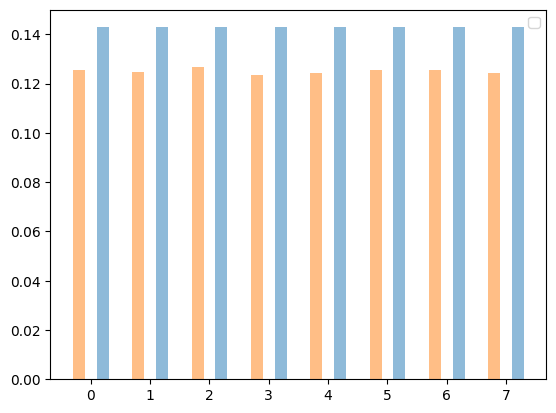

In [107]:
import matplotlib.pyplot as plt 
import numpy as np 

bins = np.linspace(0, pow(2, LEVELS - 1) - 1, num = pow(2, (LEVELS - 1)))

plt.bar(bins + 0.2, normDist_list, width = 0.2, align = 'center', alpha = 0.5)
plt.bar(bins - 0.2, freqC_list, width = 0.2, align= 'center', alpha = 0.5)
plt.xticks = (bins, bins)
plt.ylabel = ('Freq')
plt.legend(loc='upper right')
plt.show()

In [105]:
# KL-divergence 
import distance
print(distance.kl_divergence(normDist_list, freqC_list))

0.15852388576843102
